# Analisando dados com Pandas - As Duas Torres

Semana passada iniciei uma jornada de análise de dados com pandas e hoje quero dar continuidade a este trabalho refinando ainda mais o que fiz no outro post, caso não tenha lido [aqui](https://medium.com/@helberfernandes2000/analisando-dados-com-pandas-497faf234878) está o link para o post anterior.

Importe os dados e vamos iniciar.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('dataset.csv', delimiter=';', encoding='iso-8859-1', parse_dates=['data'], dayfirst=True)

In [3]:
data = data.drop(["horario"], axis=1)
data.head()

,id,data,especialidade
0,24554,2018-06-11,Clínica Médica
1,24553,2018-06-11,Neurologia
2,24552,2018-06-11,Clínica Médica
3,24551,2018-06-11,Neurologia
4,24550,2018-06-11,Pediatria


## Ordenando pelo Total

Depois de importar os dados e fiz o seguinte agrupamento, para facilitar vou exibir apenas os 5 primeiros registros.

In [4]:
total_atendimento_ano=data.groupby([data['data'].dt.year, 'especialidade'])[['id']].count().rename(columns={'id': 'Total'})
total_atendimento_ano[:5]

Total
data especialidade         
2017 Cardiologista        2
     Clínica Médica    8173
     Dermatologista       6
     Ecocardiografia      2
     Ecografia            1

A primeira coisa a se notar é que os dados não estão ordenados por valor então, vamos ordena-los, porém, para facilitar nosso trabalho de exibição dos dados, vamos criar um método que irá ordenar os valores, além de retornar a quantidade de linhas que desejarmos.

In [5]:
def get_top_n(n=None):
    return total_atendimento_ano.sort_values('Total', ascending=False ).head(n)

Agora o que precisamos fazer é apenas chamar nossa função informando a quantidade desejada ou se desejarmos todos os dados apenas não informamos nada.

In [6]:
get_top_n(5)

,,Total
data,especialidade,
2017,Clínica Médica,8173
2018,Clínica Médica,6243
2017,Ortopedia,1757
2018,Ortopedia,1685
2017,Pediatria,1478


In [7]:
get_top_n()

,,Total
data,especialidade,
2017,Clínica Médica,8173
2018,Clínica Médica,6243
2017,Ortopedia,1757
2018,Ortopedia,1685
2017,Pediatria,1478
2018,Pediatria,732
2017,Psiquiatria,721
2018,Psiquiatria,617
2017,Radiologia,515


Imagine que se necessitamos saber quais especialidades teve apenas 2 atendimentos poderíamos fazer o seguinte:

In [8]:
total_atendimento_ano[total_atendimento_ano['Total']==2]

Total
data especialidade         
2017 Cardiologista        2
     Ecocardiografia      2
     Ginecologista        2

Isso será de grande ajuda quando estivermos falando sobre gráficos, mas também para outras atividades do dia a dia.

## Trabalhando MultiIndex

Antes de prosseguirmos precisamos entender um pouco sobre o objeto MultiIndex, sua documentação se encontra [aqui](http://pandas.pydata.org/pandas-docs/stable/advanced.html). 

O MultiIndex armazena os indices de nossa tabela, neste caso para facilitar podemos pensar nele como um array de tuplas. No nosso caso seria algo como:

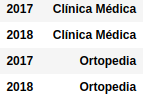


Onde teríamos:

```
(2017, Clínica Médica)
(2018, Clínica Médica)
```

Cada tupla é única. Elas formam o index de nossa tabela, cada indice possui um nome (nome da coluna do indice), para sabermos quais são os nossos podemos obter da seguinte forma.

In [9]:
total_atendimento_ano.index.names

FrozenList([u'data', u'especialidade'])

Estes nomes poderão ser alterados, faremos isso mais a frente usando a função `rename_axis`.

Agora podemos visualizar nosso indice melhor:
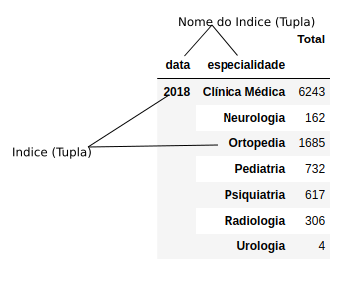

### Selecionando alguns dados

Então caso seja necessário filtrar os registros, podemos fazer da seguinte maneira.

In [10]:
total_atendimento_ano.loc[(2017)]

,Total
especialidade,
Cardiologista,2
Clínica Médica,8173
Dermatologista,6
Ecocardiografia,2
Ecografia,1
Ginecologista,2
Mamografia,1
Neurologia,413
Oftalmologista,1


Assim obtivemos o total por especialidade para o ano de 2017, da mesma forma acrescentando o nome de uma especialidade obtivemos o seguinte:

In [11]:
total_atendimento_ano.loc[(2018, 'Radiologia')]

Total    306
Name: (2018, Radiologia), dtype: int64

Abordaremos seleção de dados mais aprofundadamente em outro post, por hora é o suficiente para continuarmos.

### Levels

Agora que entendemos que quando usamos o MultiIndex possuimos indices como tuplas, fica facil entender o que são os levels. Os indices são as colunas de nosso indice, como mostra a imagem aseguir:

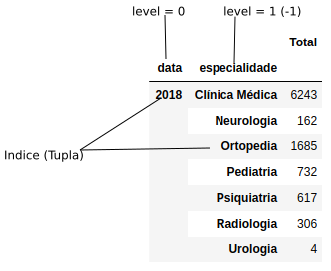

Neste caso temos 2 levels, para confirmar podemos obter o total de levels da seguinte maneira:

In [12]:
total_atendimento_ano.index.nlevels

2

Podemos obter o nome de nossos levels com o seguinte comando:

In [13]:
total_atendimento_ano.index.names

FrozenList([u'data', u'especialidade'])

Portanto os indices do levels inicia-se em 0 até n total de elementos. Ao exibirmos o objeto MultiIndex podemos ver nossos levels.

In [14]:
total_atendimento_ano.index.levels

FrozenList([[2017, 2018], [u'Cardiologista', u'Clínica Médica', u'Dermatologista', u'Ecocardiografia', u'Ecografia', u'Ginecologista', u'Mamografia', u'Neurologia', u'Oftalmologista', u'Ortopedia', u'Ortopedista', u'Pediatria', u'Psiquiatria', u'Radiologia', u'Urologia']])

Assim vemos que nossos levels são os anos e nossas especialidades. Podemos inda obter os valeres de nossos levels da seguinte maneira:

In [15]:
total_atendimento_ano.index.get_level_values(1)

Index([u'Cardiologista', u'Clínica Médica', u'Dermatologista',
       u'Ecocardiografia', u'Ecografia', u'Ginecologista', u'Mamografia',
       u'Neurologia', u'Oftalmologista', u'Ortopedia', u'Ortopedista',
       u'Pediatria', u'Psiquiatria', u'Radiologia', u'Clínica Médica',
       u'Neurologia', u'Ortopedia', u'Pediatria', u'Psiquiatria',
       u'Radiologia', u'Urologia'],
      dtype='object', name=u'especialidade')

O MultiIndex é um objeto muito importante por isso sugiro o estudo, o link para o manual se encontra [aqui](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.MultiIndex.html#pandas.MultiIndex).

Muito bem, agora estamos prontos para conituar nosso tutorial. Vamos supor que você deseje saber quantos atendimentos tivemos por especialidades por ano. Sabendo que nosso dataFrame está da seguinte maneira:

In [16]:
total_atendimento_ano[:5]

Total
data especialidade         
2017 Cardiologista        2
     Clínica Médica    8173
     Dermatologista       6
     Ecocardiografia      2
     Ecografia            1

Ou seja: possuímos dois levels `data` e `especialidade` podemos então apenas chamar a função `unstack` e informar o level que desejamos transformar em coluna, neste caso é o level 0 correspondente a nossa data.

In [17]:
total_atendimento_ano = total_atendimento_ano.unstack(level=0)
total_atendimento_ano

Total        
data               2017    2018
especialidade                  
Cardiologista       2.0     NaN
Clínica Médica   8173.0  6243.0
Dermatologista      6.0     NaN
Ecocardiografia     2.0     NaN
Ecografia           1.0     NaN
Ginecologista       2.0     NaN
Mamografia          1.0     NaN
Neurologia        413.0   162.0
Oftalmologista      1.0     NaN
Ortopedia        1757.0  1685.0
Ortopedista         1.0     NaN
Pediatria        1478.0   732.0
Psiquiatria       721.0   617.0
Radiologia        515.0   306.0
Urologia            NaN     4.0

Com isso conseguimos ver a quantidade de atendimentos de cada especialidade por ano. O que o `unstack` fez foi como que encapsular um dataFrame dentro de outro DataFrame, assim para acessar os registros de 2017 devemos fazer o seguinte:

In [18]:
total_atendimento_ano['Total'][2017]

especialidade
Cardiologista         2.0
Clínica Médica     8173.0
Dermatologista        6.0
Ecocardiografia       2.0
Ecografia             1.0
Ginecologista         2.0
Mamografia            1.0
Neurologia          413.0
Oftalmologista        1.0
Ortopedia          1757.0
Ortopedista           1.0
Pediatria          1478.0
Psiquiatria         721.0
Radiologia          515.0
Urologia              NaN
Name: 2017, dtype: float64

O DataFrame nos permite obter por meio do slice todos os registros entre `Cardiologista` e `Ecografia` por exemplo.

In [19]:
total_atendimento_ano.loc['Cardiologista':'Ecografia']

Total        
data               2017    2018
especialidade                  
Cardiologista       2.0     NaN
Clínica Médica   8173.0  6243.0
Dermatologista      6.0     NaN
Ecocardiografia     2.0     NaN
Ecografia           1.0     NaN

## As duas torres

Vimos até o momento como é poderoso o MultiIndex, com o seu index e levels aqui apelidados de as duas tores, rsrsrs. Agora vamos adicionar mais um level e obtermos todos os registros de 2017 e 2018 de cada especialidade por mes. Iniciando com o comando o tutorial anterior temos:

In [20]:
ano_especialidade_mes=data.groupby([data['data'].dt.year, data['data'].dt.month, 'especialidade'])[['id']].count().rename(columns={'id': 'Total'})

Observe que nosso agrupamento foi criado pelo ano, mês e especialidade, porém observe que o mês aparece o número correspondente ao mês, neste caso 3 correspondente a o mês de março.

In [21]:
ano_especialidade_mes[:1]

,,,Total
data,data,especialidade,
2017,3,Cardiologista,1


Vamos criar uma função para renomear o nome das nossas colunas de números correspondentes ao mês para seus respectivos nomes, além disso vamos usar a função `rename_axis` para renomear nossas colunas de index.

In [22]:
def rename(dataFrame):
    return dataFrame.rename(columns={1: 'Janeiro', 2: 'Fevereiro', 3: 'Maço', 4: 'Abril', 5: 'Maio', 6:'Junho', 7:'Julho', 8:'Agosto', 9:'Setembro', 10:'Outubro', 11: 'Novembro', 12:'Dezembro'}).rename_axis(('Ano', 'Especialidades'))

Com nossa função pronta agora podemos chamar a função `unstack` para transformar nosso dataFrame e em seguida renomear, o resultado será o seguinte:

In [23]:
ano_especialidade_mes =rename(ano_especialidade_mes.unstack(level=1))
ano_especialidade_mes

Total                                                  \
data                 Janeiro Fevereiro   Maço   Abril    Maio  Junho   Julho   
Ano  Especialidades                                                            
2017 Cardiologista       NaN       NaN    1.0     1.0     NaN    NaN     NaN   
     Clínica Médica      NaN       NaN  339.0   653.0    14.0  870.0  1114.0   
     Dermatologista      NaN       NaN    6.0     NaN     NaN    NaN     NaN   
     Ecocardiografia     NaN       NaN    2.0     NaN     NaN    NaN     NaN   
     Ecografia           NaN       NaN    1.0     NaN     NaN    NaN     NaN   
     Ginecologista       NaN       NaN    2.0     NaN     NaN    NaN     NaN   
     Mamografia          NaN       NaN    1.0     NaN     NaN    NaN     NaN   
     Neurologia          NaN       NaN   22.0    82.0     1.0  139.0    80.0   
     Oftalmologista      NaN       NaN    1.0     NaN     NaN    NaN     NaN   
     Ortopedia           NaN       NaN   40.0   153.0     3.0  246.0   199.0   
     Ortopedista         NaN       NaN    1.0     NaN     NaN    NaN     NaN   
     Pediatria           NaN       NaN   46.0   146.0     NaN  202.0   201.0   
     Psiquiatria         NaN       NaN   30.0    76.0     1.0   97.0    70.0   
     Radiologia          NaN       NaN   41.0    54.0     1.0   41.0    45.0   
2018 Clínica Médica    893.0     411.0  974.0  1805.0  1761.0  399.0     NaN   
     Neurologia          NaN       NaN    NaN    16.0   113.0   33.0     NaN   
     Ortopedia         194.0      75.0  298.0   511.0   462.0  145.0     NaN   
     Pediatria         119.0      58.0  152.0   157.0   193.0   53.0     NaN   
     Psiquiatria        89.0      28.0   85.0   186.0   196.0   33.0     NaN   
     Radiologia         68.0      33.0   46.0    67.0    75.0   17.0     NaN   
     Urologia            NaN       NaN    2.0     NaN     2.0    NaN     NaN   

                                                                 
data                  Agosto Setembro Outubro Novembro Dezembro  
Ano  Especialidades                                              
2017 Cardiologista       NaN      NaN     NaN      NaN      NaN  
     Clínica Médica   1188.0   1116.0  1130.0    932.0    817.0  
     Dermatologista      NaN      NaN     NaN      NaN      NaN  
     Ecocardiografia     NaN      NaN     NaN      NaN      NaN  
     Ecografia           NaN      NaN     NaN      NaN      NaN  
     Ginecologista       NaN      NaN     NaN      NaN      NaN  
     Mamografia          NaN      NaN     NaN      NaN      NaN  
     Neurologia         63.0     21.0     5.0      NaN      NaN  
     Oftalmologista      NaN      NaN     NaN      NaN      NaN  
     Ortopedia         256.0    285.0   232.0    200.0    143.0  
     Ortopedista         NaN      NaN     NaN      NaN      NaN  
     Pediatria         197.0    208.0   166.0    178.0    134.0  
     Psiquiatria       128.0    118.0    73.0     71.0     57.0  
     Radiologia         75.0     72.0    67.0     68.0     51.0  
2018 Clínica Médica      NaN      NaN     NaN      NaN      NaN  
     Neurologia          NaN      NaN     NaN      NaN      NaN  
     Ortopedia           NaN      NaN     NaN      NaN      NaN  
     Pediatria           NaN      NaN     NaN      NaN      NaN  
     Psiquiatria         NaN      NaN     NaN      NaN      NaN  
     Radiologia          NaN      NaN     NaN      NaN      NaN  
     Urologia            NaN      NaN     NaN      NaN      NaN

Observe que agora temos os registros agrupado por ano e especialidade por mês, mais obtivemos vários valores `NaN` para normalizar isso podemos usar a função `fillna` e preencher estes valores com zero.

In [24]:
ano_especialidade_mes = ano_especialidade_mes.fillna(0)
ano_especialidade_mes

Total                                                  \
data                 Janeiro Fevereiro   Maço   Abril    Maio  Junho   Julho   
Ano  Especialidades                                                            
2017 Cardiologista       0.0       0.0    1.0     1.0     0.0    0.0     0.0   
     Clínica Médica      0.0       0.0  339.0   653.0    14.0  870.0  1114.0   
     Dermatologista      0.0       0.0    6.0     0.0     0.0    0.0     0.0   
     Ecocardiografia     0.0       0.0    2.0     0.0     0.0    0.0     0.0   
     Ecografia           0.0       0.0    1.0     0.0     0.0    0.0     0.0   
     Ginecologista       0.0       0.0    2.0     0.0     0.0    0.0     0.0   
     Mamografia          0.0       0.0    1.0     0.0     0.0    0.0     0.0   
     Neurologia          0.0       0.0   22.0    82.0     1.0  139.0    80.0   
     Oftalmologista      0.0       0.0    1.0     0.0     0.0    0.0     0.0   
     Ortopedia           0.0       0.0   40.0   153.0     3.0  246.0   199.0   
     Ortopedista         0.0       0.0    1.0     0.0     0.0    0.0     0.0   
     Pediatria           0.0       0.0   46.0   146.0     0.0  202.0   201.0   
     Psiquiatria         0.0       0.0   30.0    76.0     1.0   97.0    70.0   
     Radiologia          0.0       0.0   41.0    54.0     1.0   41.0    45.0   
2018 Clínica Médica    893.0     411.0  974.0  1805.0  1761.0  399.0     0.0   
     Neurologia          0.0       0.0    0.0    16.0   113.0   33.0     0.0   
     Ortopedia         194.0      75.0  298.0   511.0   462.0  145.0     0.0   
     Pediatria         119.0      58.0  152.0   157.0   193.0   53.0     0.0   
     Psiquiatria        89.0      28.0   85.0   186.0   196.0   33.0     0.0   
     Radiologia         68.0      33.0   46.0    67.0    75.0   17.0     0.0   
     Urologia            0.0       0.0    2.0     0.0     2.0    0.0     0.0   

                                                                 
data                  Agosto Setembro Outubro Novembro Dezembro  
Ano  Especialidades                                              
2017 Cardiologista       0.0      0.0     0.0      0.0      0.0  
     Clínica Médica   1188.0   1116.0  1130.0    932.0    817.0  
     Dermatologista      0.0      0.0     0.0      0.0      0.0  
     Ecocardiografia     0.0      0.0     0.0      0.0      0.0  
     Ecografia           0.0      0.0     0.0      0.0      0.0  
     Ginecologista       0.0      0.0     0.0      0.0      0.0  
     Mamografia          0.0      0.0     0.0      0.0      0.0  
     Neurologia         63.0     21.0     5.0      0.0      0.0  
     Oftalmologista      0.0      0.0     0.0      0.0      0.0  
     Ortopedia         256.0    285.0   232.0    200.0    143.0  
     Ortopedista         0.0      0.0     0.0      0.0      0.0  
     Pediatria         197.0    208.0   166.0    178.0    134.0  
     Psiquiatria       128.0    118.0    73.0     71.0     57.0  
     Radiologia         75.0     72.0    67.0     68.0     51.0  
2018 Clínica Médica      0.0      0.0     0.0      0.0      0.0  
     Neurologia          0.0      0.0     0.0      0.0      0.0  
     Ortopedia           0.0      0.0     0.0      0.0      0.0  
     Pediatria           0.0      0.0     0.0      0.0      0.0  
     Psiquiatria         0.0      0.0     0.0      0.0      0.0  
     Radiologia          0.0      0.0     0.0      0.0      0.0  
     Urologia            0.0      0.0     0.0      0.0      0.0

Agora caso queiramos obter os dados de 2018 por exemplo podemos fazer o seguinte:

In [25]:
ano_especialidade_mes.loc[2018]

Total                                                       \
data           Janeiro Fevereiro   Maço   Abril    Maio  Junho Julho Agosto   
Especialidades                                                                
Clínica Médica   893.0     411.0  974.0  1805.0  1761.0  399.0   0.0    0.0   
Neurologia         0.0       0.0    0.0    16.0   113.0   33.0   0.0    0.0   
Ortopedia        194.0      75.0  298.0   511.0   462.0  145.0   0.0    0.0   
Pediatria        119.0      58.0  152.0   157.0   193.0   53.0   0.0    0.0   
Psiquiatria       89.0      28.0   85.0   186.0   196.0   33.0   0.0    0.0   
Radiologia        68.0      33.0   46.0    67.0    75.0   17.0   0.0    0.0   
Urologia           0.0       0.0    2.0     0.0     2.0    0.0   0.0    0.0   

                                                   
data           Setembro Outubro Novembro Dezembro  
Especialidades                                     
Clínica Médica      0.0     0.0      0.0      0.0  
Neurologia          0.0     0.0      0.0      0.0  
Ortopedia           0.0     0.0      0.0      0.0  
Pediatria           0.0     0.0      0.0      0.0  
Psiquiatria         0.0     0.0      0.0      0.0  
Radiologia          0.0     0.0      0.0      0.0  
Urologia            0.0     0.0      0.0      0.0

Uma funcionalidade muito interessante é poder exportar este resultado para csv por exemplo, para isso precisamos executar o seguinte:

In [26]:
ano_especialidade_mes.to_csv('EspecialidadesPorMes.csv', encoding='iso-8859-1')